In [103]:
from logicqubit.logic import *
from cmath import *
import numpy as np
from scipy.linalg import expm, sinm, cosm, logm, sqrtm
#from qiskit.quantum_info.synthesis import euler_angles_1q, decompose_two_qubit_product_gate

In [104]:
def qft(qr):
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], pi/float(2**(i-j)))
        qr[i].H()
        
def iqft(qr): # transformada quântica de Fourier inversa
    for i in range(len(qr)):
        for j in range(i):
            qr[i].CU1(qr[j], -pi/float(2**(i-j)))
        qr[i].H()
        
def swap(s1, s2):
    s2.CX(s1)
    s1.CX(s2)
    s2.CX(s1)

In [169]:
# matriz unitária diagonal 4x4 
'''a1=0.5
a2=1.2
a3=2.5
a4=0.75

H1 = np.matrix([[a1, 0], [0, a2]])
H2 = np.matrix([[a3, 0], [0, a4]])
H=np.kron(H2,H1)
H_ad = H.getH()

U = np.array(expm(1j*H))
U
#U = U.tolist()
print(U)'''

#U2 = np.matrix([[exp(1j*a1), 0, 0, 0], [0, exp(1j*a2), 0, 0], [0, 0, exp(1j*a3), 0], [0, 0, 0, exp(1j*a4)]])
#print(U2)

'a1=0.5\na2=1.2\na3=2.5\na4=0.75\n\nH1 = np.matrix([[a1, 0], [0, a2]])\nH2 = np.matrix([[a3, 0], [0, a4]])\nH=np.kron(H2,H1)\nH_ad = H.getH()\n\nU = np.array(expm(1j*H))\nU\n#U = U.tolist()\nprint(U)'

In [170]:
U1 = np.matrix([[1+1j, 0],[0, 2j]])
U2 = np.matrix([[2+1j, 0],[0, 1j]])
U = np.kron(U1, U2)
print(U1)

H = -1j*logm(U)
#H = -1j*logm(U)
#H_ad = H.getH()
print(H)

[[1.+1.j 0.+0.j]
 [0.+0.j 0.+2.j]]
[[1.24904577-1.15129255j 0.        -0.j         0.        -0.j
  0.        -0.j        ]
 [0.        -0.j         2.35619449-0.34657359j 0.        -0.j
  0.        -0.j        ]
 [0.        -0.j         0.        -0.j         2.03444394-1.49786614j
  0.        -0.j        ]
 [0.        -0.j         0.        -0.j         0.        -0.j
  3.14159265-0.69314718j]]


In [171]:
h_eigenvalue = np.linalg.eigh(H)
#eigenvalue = np.linalg.eig(U)
print(h_eigenvalue)

(array([1.24904577, 2.03444394, 2.35619449, 3.14159265]), array([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
       [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]]))


In [172]:
eigenvalue = np.linalg.eig(U)
print(eigenvalue)

(array([ 1.+3.j, -1.+1.j, -2.+4.j, -2.+0.j]), matrix([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
        [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]]))


In [173]:
'''D = np.matrix('0.78539816 0; 0 1.57079633')
P = np.matrix('1 0; 0 1')/sqrt(2)

H = P*D*P.I
H_ad = H.getH()

#H = Y;
#H = np.matrix([[1.5, 0.5],[0.5 , 1.5]])
U1 = np.matrix(expm(1j*H))
print(U1)'''

"D = np.matrix('0.78539816 0; 0 1.57079633')\nP = np.matrix('1 0; 0 1')/sqrt(2)\n\nH = P*D*P.I\nH_ad = H.getH()\n\n#H = Y;\n#H = np.matrix([[1.5, 0.5],[0.5 , 1.5]])\nU1 = np.matrix(expm(1j*H))\nprint(U1)"

In [175]:
logicQuBit  = LogicQuBit(7)

x1 = Qubit()
x2 = Qubit()
x3 = Qubit()
x4 = Qubit()

y1 = Qubit()
y2 = Qubit()

x1.H()
x2.H()
x3.H()
x4.H()

#y1.X()
y1.H()

y1.CU(x4, U1)

y1.CU(x3, U1)
y1.CU(x3, U1)

y1.CU(x2, U1)
y1.CU(x2, U1)
y1.CU(x2, U1)
y1.CU(x2, U1)

y1.CU(x1, U1)
y1.CU(x1, U1)
y1.CU(x1, U1)
y1.CU(x1, U1)
y1.CU(x1, U1)
y1.CU(x1, U1)
y1.CU(x1, U1)
y1.CU(x1, U1)

#y2.X()
y2.H()

y2.CU(x4, U2)

y2.CU(x3, U2)
y2.CU(x3, U2)

y2.CU(x2, U2)
y2.CU(x2, U2)
y2.CU(x2, U2)
y2.CU(x2, U2)

y2.CU(x1, U2)
y2.CU(x1, U2)
y2.CU(x1, U2)
y2.CU(x1, U2)
y2.CU(x1, U2)
y2.CU(x1, U2)
y2.CU(x1, U2)
y2.CU(x1, U2)

iqft([x1,x2,x3,x4])

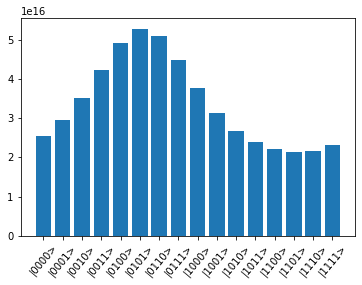

[2.5601085069057332e+16, 2.9584418768169056e+16, 3.522167378802986e+16, 4.227505314391422e+16, 4.923272235496859e+16, 5.298946586783967e+16, 5.114097848641327e+16, 4.493523376108194e+16, 3.764781002839923e+16, 3.142564693821033e+16, 2.6859262127043264e+16, 2.382754825641643e+16, 2.2069539965877216e+16, 2.1389727950166984e+16, 2.1706451241045076e+16, 2.305811180790104e+16]


In [176]:
res = logicQuBit.Measure([x1,x2,x3,x4])
logicQuBit.Plot()
print(res)

In [178]:
def Text2List(table):
    list = [int(i, base=2) for i in table]
    size = len(table[0])
    tmp = sorted(list, key=int, reverse=False)  # values in ascending order
    result = [[int(bin(j)[2:].zfill(size)[i]) for i in range(size)] for j in tmp]
    return result

def BinList(n):
    blist = []
    for i in iter(range(2 ** n)):
        b = bin(i)[2:].zfill(n)  # value in binary, ex: i=1, n=4 -> '0001'
        blist.append(b)
    return Text2List(blist)

size=4
blist = [value for i,value in enumerate(BinList(size)) if res[i]>0.52] 
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
print(results)

[0.0, 0.39269908169872414, 0.7853981633974483, 1.1780972450961724, 1.5707963267948966, 1.9634954084936207, 2.356194490192345, 2.748893571891069, 3.141592653589793, 3.5342917352885173, 3.9269908169872414, 4.319689898685965, 4.71238898038469, 5.105088062083414, 5.497787143782138, 5.890486225480862]


In [30]:
# todos possíveis valores
size = 4
blist = [[i >> bl & 0x1 for bl in range(size)][::-1] for i in range(2**size)]
results = [2*pi*sum([value/2**(i+1) for i,value in enumerate(j)]) for j in blist]
results

[0.0,
 0.39269908169872414,
 0.7853981633974483,
 1.1780972450961724,
 1.5707963267948966,
 1.9634954084936207,
 2.356194490192345,
 2.748893571891069,
 3.141592653589793,
 3.5342917352885173,
 3.9269908169872414,
 4.319689898685965,
 4.71238898038469,
 5.105088062083414,
 5.497787143782138,
 5.890486225480862]